# Daten einlesen

## Notwendige Bibliotheken importieren

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Daten laden und in DataFrame verbinden

In [70]:
# Download Data
umsatzdaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/umsatzdaten_gekuerzt.csv"

kiwodaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/kiwo.csv"

wetterdaten_url = "https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml/raw/main/wetter.csv"

# Daten von den URLs herunterladen und in Pandas DataFrames laden
umsatzdaten = pd.read_csv(umsatzdaten_url)
kiwo = pd.read_csv(kiwodaten_url)
wetter = pd.read_csv(wetterdaten_url)

#Outer Join
merged_data = pd.merge(umsatzdaten, kiwo, on='Datum', how='outer')
merged_data = pd.merge(merged_data, wetter, on='Datum', how='outer')

# Gib den zusammengeführten DataFrame aus
print(merged_data)

            Datum  Warengruppe  Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0      2012-01-01          NaN     NaN          NaN         8.0      9.8250   
1      2012-01-02          NaN     NaN          NaN         7.0      7.4375   
2      2012-01-03          NaN     NaN          NaN         8.0      5.5375   
3      2012-01-04          NaN     NaN          NaN         4.0      5.6875   
4      2012-01-05          NaN     NaN          NaN         6.0      5.3000   
...           ...          ...     ...          ...         ...         ...   
10114  2019-07-28          NaN     NaN          NaN         3.0     23.3500   
10115  2019-07-29          NaN     NaN          NaN         6.0     25.2500   
10116  2019-07-30          NaN     NaN          NaN         7.0     20.7375   
10117  2019-07-31          NaN     NaN          NaN         6.0     20.4500   
10118  2019-08-01          NaN     NaN          NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  
0         

In [71]:
# Überprüfung auf fehlende Werte
missing_values = merged_data.isnull()

# Ausgabe der Anzahl fehlender Werte pro Spalte
print("Anzahl fehlender Werte pro Spalte:")
print(missing_values.sum())

# Alternativ: Anzeige der gesamten fehlenden Werte
print("\nGesamte Anzahl fehlender Werte:")
print(missing_values.sum().sum())

Anzahl fehlender Werte pro Spalte:
Datum                     0
Warengruppe             785
Umsatz                  785
KielerWoche            9869
Bewoelkung               71
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2538
dtype: int64

Gesamte Anzahl fehlender Werte:
14080


## Datum konvertieren / Wochentag hinzufügen

Hier ist der Unterschied im Modell zu finden! Der auskommentierte Code führt dazu, dass sich der Wert von 0.877 auf 0.7?? ändert

In [72]:
#Konvertiere die Spalte "Datum" in einen Datumsdatentypen 
merged_data["Datum"] = pd.to_datetime(merged_data["Datum"])

# 1. Spalte für Wochentage als numerischen Wert hinzufügen
merged_data['Wochentag_Numerisch'] = merged_data['Datum'].dt.weekday

# Fülle NaN-Werte in 'Kieler Woche' mit 0
#merged_data['KielerWoche'] = merged_data['KielerWoche'].fillna(0)

# Füge eine Spalte hinzu, die angibt, ob es sich um die Kieler Woche handelt
#merged_data['KielerWoche'] = merged_data['KielerWoche'].astype(int) #(wenn ich diesen code mit einfüge, dann ändert sich der wert im modell)

# Füge eine Spalte hinzu, die angibt, ob es sich um ein Wochenende handelt
merged_data['Wochenende'] = merged_data['Datum'].dt.dayofweek >= 5
merged_data['Wochenende'] = merged_data['Wochenende'].astype(int)

print(merged_data)

           Datum  Warengruppe  Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0     2012-01-01          NaN     NaN            0         8.0      9.8250   
1     2012-01-02          NaN     NaN            0         7.0      7.4375   
2     2012-01-03          NaN     NaN            0         8.0      5.5375   
3     2012-01-04          NaN     NaN            0         4.0      5.6875   
4     2012-01-05          NaN     NaN            0         6.0      5.3000   
...          ...          ...     ...          ...         ...         ...   
10114 2019-07-28          NaN     NaN            0         3.0     23.3500   
10115 2019-07-29          NaN     NaN            0         6.0     25.2500   
10116 2019-07-30          NaN     NaN            0         7.0     20.7375   
10117 2019-07-31          NaN     NaN            0         6.0     20.4500   
10118 2019-08-01          NaN     NaN            0         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  Wochentag_Numerisch  Wo

#Konvertiere die Spalte "Datum" in einen Datumsdatentypen 
merged_data["Datum"] = pd.to_datetime(merged_data["Datum"])

# 1. Spalte für Wochentage als numerischen Wert hinzufügen
merged_data['Wochentag_Numerisch'] = merged_data['Datum'].dt.weekday

# Fülle NaN-Werte in 'Kieler Woche' mit 0
#merged_data['KielerWoche'] = merged_data['KielerWoche'].fillna(0)

# Füge eine Spalte hinzu, die angibt, ob es sich um die Kieler Woche handelt
#merged_data['KielerWoche'] = merged_data['KielerWoche'].astype(int)
--> wenn ich diesen Kommentar raus
# Füge eine Spalte hinzu, die angibt, ob es sich um ein Wochenende handelt
merged_data['Wochenende'] = merged_data['Datum'].dt.dayofweek >= 5
#merged_data['Wochenende'] = merged_data['Wochenende'].astype(int)

print(merged_data)

## Feiertage hinzufügen / Umsatz je Feiertag und Warengruppe

In [73]:
# Feiertage als Liste von Datumsangaben (Beispieldaten)
feiertage = pd.to_datetime([
    '2012-01-01', '2012-04-06', '2012-04-09', '2012-05-01', '2012-05-17', '2012-05-28', '2012-10-03', '2012-12-25', '2012-12-26', '2013-01-01', '2013-03-29', '2013-04-01', '2013-05-01', '2013-05-09', '2013-05-20', '2013-10-03', '2013-12-25', '2013-12-26', '2014-01-01', '2014-04-18', '2014-04-21', '2014-05-01', '2014-05-29', '2014-06-09', '2014-10-03', '2014-12-25', '2014-12-26', '2015-01-01', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-14', '2015-05-25', '2015-10-03', '2015-12-25', '2015-12-26', '2016-01-01', '2016-03-25', '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26', '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03', '2017-12-25', '2017-12-26',
'2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01', '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26', '2019-01-01', '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25', '2019-12-26'
] )

# Füge eine Spalte hinzu, die anzeigt, ob das Datum ein Feiertag ist (1) oder nicht (0)
merged_data['Feiertag'] = merged_data['Datum'].isin(feiertage).astype(int)

# Anzeige des DataFrames mit der neuen Spalte
print(merged_data)

# Gruppieren nach Feiertag und Warengruppe und Aggregieren des Umsatzes
umsatz_je_feiertag_warengruppe = merged_data.groupby(['Feiertag'] + [col for col in merged_data.columns if 'Warengruppe_' in col])['Umsatz'].sum().reset_index()

# Anzeige der Ergebnisse
print(umsatz_je_feiertag_warengruppe)


           Datum  Warengruppe  Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0     2012-01-01          NaN     NaN            0         8.0      9.8250   
1     2012-01-02          NaN     NaN            0         7.0      7.4375   
2     2012-01-03          NaN     NaN            0         8.0      5.5375   
3     2012-01-04          NaN     NaN            0         4.0      5.6875   
4     2012-01-05          NaN     NaN            0         6.0      5.3000   
...          ...          ...     ...          ...         ...         ...   
10114 2019-07-28          NaN     NaN            0         3.0     23.3500   
10115 2019-07-29          NaN     NaN            0         6.0     25.2500   
10116 2019-07-30          NaN     NaN            0         7.0     20.7375   
10117 2019-07-31          NaN     NaN            0         6.0     20.4500   
10118 2019-08-01          NaN     NaN            0         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  Wochentag_Numerisch  Wo

## Umsatz nach Wochentag und Warengruppe gruppieren

In [74]:
# Gruppiere die Daten nach Wochentag und Warengruppe und aggregiere die Umsätze
umsatz_je_wochentag_warengruppe = merged_data.groupby(["Wochentag_Numerisch", "Warengruppe"])["Umsatz"].sum().reset_index()

# Ausgabe des Ergebnisses
print(umsatz_je_wochentag_warengruppe)

plt.tight_layout()
plt.show()

    Wochentag_Numerisch  Warengruppe         Umsatz
0                     0          1.0   34349.518577
1                     0          2.0   94518.267009
2                     0          3.0   38768.415694
3                     0          4.0   20668.483499
4                     0          5.0   65505.413757
5                     0          6.0    2633.407614
6                     1          1.0   31035.935115
7                     1          2.0   92908.071950
8                     1          3.0   38040.052609
9                     1          4.0   19807.539861
10                    1          5.0   68043.250991
11                    1          6.0    2950.421577
12                    2          1.0   30686.879782
13                    2          2.0   91747.856697
14                    2          3.0   37755.007020
15                    2          4.0   19276.580698
16                    2          5.0   69612.460394
17                    2          6.0    2516.051662
18          

<Figure size 640x480 with 0 Axes>

### Visualisierung

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

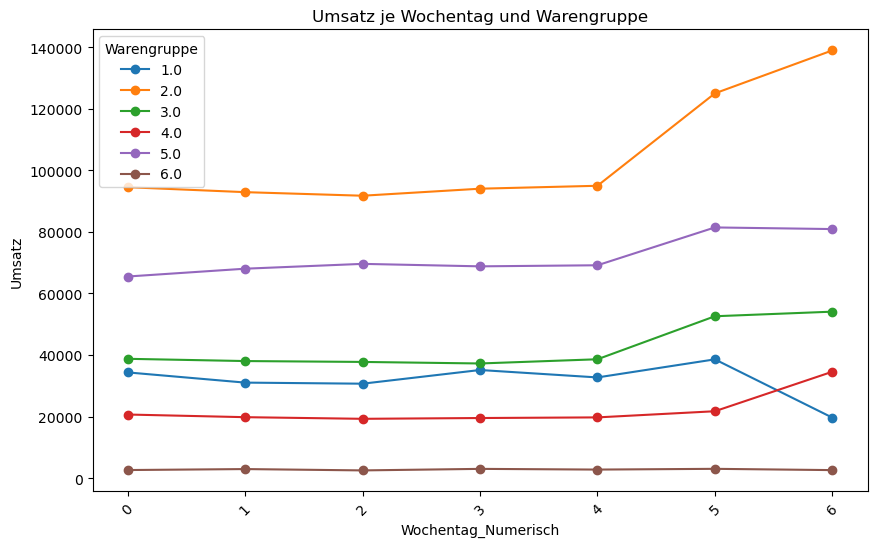

In [75]:
# Erstelle die Visualisierung
plt.figure(figsize=(10, 6))
for warengruppe in umsatz_je_wochentag_warengruppe["Warengruppe"].unique():
    data = umsatz_je_wochentag_warengruppe[umsatz_je_wochentag_warengruppe["Warengruppe"] == warengruppe]
    plt.plot(data["Wochentag_Numerisch"], data["Umsatz"], marker='o', label=warengruppe)

plt.xlabel("Wochentag_Numerisch")
plt.ylabel("Umsatz")
plt.title("Umsatz je Wochentag und Warengruppe")
plt.legend(title="Warengruppe")
plt.xticks(rotation=45)

# Deskriptive Statistiken berechnen

In [76]:
# Temperatur
temp_stats = merged_data['Temperatur'].describe()

# Umsatz
umsatz_stats = merged_data['Umsatz'].describe()

# Wind
wind_stats = merged_data['Windgeschwindigkeit'].describe()

# Umsatz je Warengruppe
deskriptive_statistiken = merged_data.groupby("Warengruppe")["Umsatz"].describe()

## Output deskriptive Statistiken

In [77]:
# Output der Deskriptiven Statistiken
print("Deskriptive Statistiken für Temperatur:")
print(temp_stats)

print("\nDeskriptive Statistiken für Umsatz:")
print(umsatz_stats)

print("\nDeskriptive Statistiken für Windgeschwindigkeit:")
print(wind_stats)

# Ausgabe der deskriptiven Statistiken
print(deskriptive_statistiken)

Deskriptive Statistiken für Temperatur:
count    10103.000000
mean        12.014560
std          7.212466
min        -10.250000
25%          6.250000
50%         11.625000
75%         17.875000
max         32.671428
Name: Temperatur, dtype: float64

Deskriptive Statistiken für Umsatz:
count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64

Deskriptive Statistiken für Windgeschwindigkeit:
count    10103.000000
mean        11.026527
std          4.131774
min          3.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         35.000000
Name: Windgeschwindigkeit, dtype: float64
              count        mean         std         min         25%  \
Warengruppe                                                           
1.0          1819.0  122.142509   40.299209   23.108406   96.436728   
2.0          1819.0  402.497911  139

# Korrelationen berechnen

In [78]:
# Korrelationen berechnen
corr_umsatz_weekend = merged_data['Umsatz'].corr(merged_data['Wochenende'].astype(int))
corr_umsatz_weekday = merged_data.groupby('Wochentag_Numerisch')['Umsatz'].mean()
corr_umsatz_temp = merged_data['Umsatz'].corr(merged_data['Temperatur'])
corr_umsatz_wind = merged_data['Umsatz'].corr(merged_data['Windgeschwindigkeit'])

# Korrelationsmatrix für Umsatzdaten
corr_matrix = merged_data.corr()

# Korrelationen zwischen Umsatz und einzelnen Wochentagen berechnen
corr_umsatz_weekdays = {}
for day in range(7):
    # Filtere den DataFrame nach dem aktuellen Wochentag
    day_data = merged_data[merged_data['Wochentag_Numerisch'] == day]
    # Berechne die Korrelation zwischen Umsatz und dem aktuellen Wochentag
    corr = day_data['Umsatz'].corr(day_data['Wochentag_Numerisch'])
    # Speichere die Korrelation für den aktuellen Wochentag
    corr_umsatz_weekdays[day] = corr

# Ausgabe der Korrelationen für die einzelnen Wochentage
for day, corr in corr_umsatz_weekdays.items():
    print(f"Korrelation zwischen Umsatz und {day}: {corr}")



# Berechne die Kontingenztabelle
kontingenztabelle = pd.crosstab(merged_data["Warengruppe"], merged_data["Wochenende"])

# Berechne Cramér's V
chi2 = stats.chi2_contingency(kontingenztabelle)[0]
n = kontingenztabelle.sum().sum()
min_dim = min(kontingenztabelle.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Optional: Ausgabe der Kontingenztabelle zur Überprüfung
print(kontingenztabelle)

Korrelation zwischen Umsatz und 0: nan
Korrelation zwischen Umsatz und 1: nan
Korrelation zwischen Umsatz und 2: nan
Korrelation zwischen Umsatz und 3: nan
Korrelation zwischen Umsatz und 4: nan
Korrelation zwischen Umsatz und 5: nan
Korrelation zwischen Umsatz und 6: nan
Cramér's V: 0.002742493155364742
Wochenende      0    1
Warengruppe           
1.0          1298  521
2.0          1298  521
3.0          1298  521
4.0          1255  511
5.0          1298  521
6.0           209   83


/Applications/miniconda3/envs/python_course/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Applications/miniconda3/envs/python_course/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [79]:
mod = smf.ols('Umsatz ~ C(Warengruppe) + Temperatur + Wochenende + KielerWoche  + C(Wochentag_Numerisch)', data=merged_data).fit()

# Print the summary
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1775.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:48:46   Log-Likelihood:                -53757.
No. Observations:                9318   AIC:                         1.075e+05
Df Residuals:                    9304   BIC:                         1.076e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [80]:
# Erstelle eine numerische Darstellung des Wochentags
merged_data["Wochentag_Numerisch"] = merged_data["Datum"].dt.dayofweek

# Baue das Modell, inklusive Interaktionsterm zwischen Warengruppe und Wochentag
mod = smf.ols('Umsatz ~ C(Warengruppe) * C(Wochentag_Numerisch) + Temperatur + Wochenende + KielerWoche', data=merged_data).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     637.3
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:48:46   Log-Likelihood:                -53162.
No. Observations:                9318   AIC:                         1.064e+05
Df Residuals:                    9274   BIC:                         1.067e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [81]:
# Baue das Modell, inklusive Interaktionstermen zwischen Warengruppe und Wochentag sowie Warengruppe und KielerWoche
mod = smf.ols('Umsatz ~ C(Warengruppe) * C(Wochentag_Numerisch) + Temperatur + Wochenende + C(Warengruppe) * KielerWoche', data=merged_data).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     589.2
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:48:47   Log-Likelihood:                -53124.
No. Observations:                9318   AIC:                         1.063e+05
Df Residuals:                    9270   BIC:                         1.067e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

# Aufteilung der Daten

In [82]:
# Aufteilen des Datensatzes in Trainings- und Validierungsdaten (70:30)
train_data, validation_data = train_test_split(merged_data, test_size=0.3, random_state=42)

# Ausgabe der Anzahl der Beispiele in Trainings- und Validierungsdaten
print("Anzahl der Trainingsdaten:", len(train_data))
print("Anzahl der Validierungsdaten:", len(validation_data))

Anzahl der Trainingsdaten: 7083
Anzahl der Validierungsdaten: 3036


# Training des Modell

## Fehlende Werte 

In [83]:
# Anzeige der Anzahl der fehlenden Werte in jeder Spalte
missing_values = merged_data.isnull().sum()
print(missing_values)

# Anzeige der Gesamtanzahl der fehlenden Werte
total_missing_values = merged_data.isnull().sum().sum()
print(f"Gesamtanzahl der fehlenden Werte: {total_missing_values}")

Datum                     0
Warengruppe             785
Umsatz                  785
KielerWoche               0
Bewoelkung               71
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2538
Wochentag_Numerisch       0
Wochenende                0
Feiertag                  0
dtype: int64
Gesamtanzahl der fehlenden Werte: 4211


In [84]:
# Anzeige der Anzahl der fehlenden Werte in jeder Spalte
missing_values = validation_data.isnull().sum()
print(missing_values)

# Anzeige der Gesamtanzahl der fehlenden Werte
total_missing_values = validation_data.isnull().sum().sum()
print(f"Gesamtanzahl der fehlenden Werte: {total_missing_values}")

Datum                    0
Warengruppe            253
Umsatz                 253
KielerWoche              0
Bewoelkung              19
Temperatur               5
Windgeschwindigkeit      5
Wettercode             769
Wochentag_Numerisch      0
Wochenende               0
Feiertag                 0
dtype: int64
Gesamtanzahl der fehlenden Werte: 1304


In [85]:
# Anzeige der Anzahl der fehlenden Werte in jeder Spalte
missing_values = train_data.isnull().sum()
print(missing_values)

# Anzeige der Gesamtanzahl der fehlenden Werte
total_missing_values = train_data.isnull().sum().sum()
print(f"Gesamtanzahl der fehlenden Werte: {total_missing_values}")

Datum                     0
Warengruppe             532
Umsatz                  532
KielerWoche               0
Bewoelkung               52
Temperatur               11
Windgeschwindigkeit      11
Wettercode             1769
Wochentag_Numerisch       0
Wochenende                0
Feiertag                  0
dtype: int64
Gesamtanzahl der fehlenden Werte: 2907


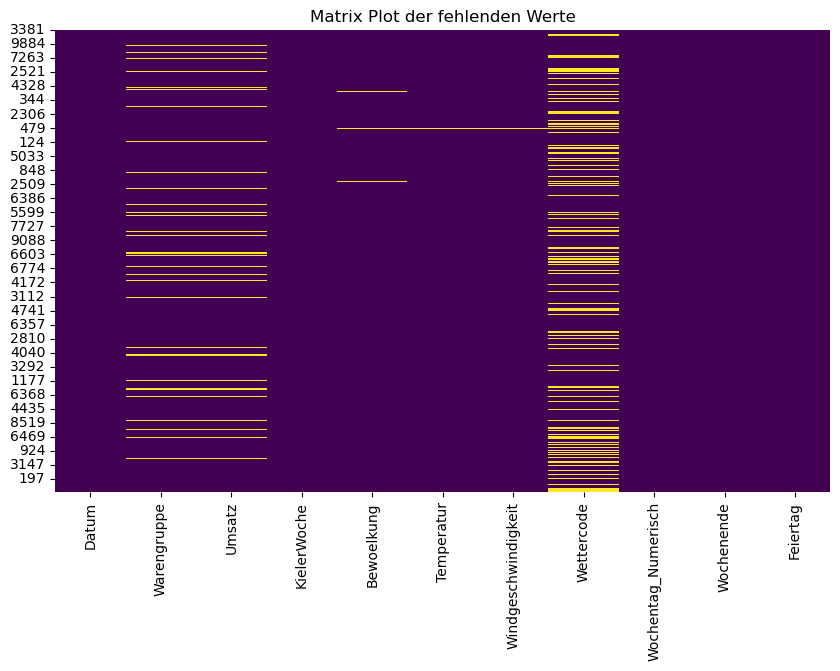

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrix Plot erstellen
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Matrix Plot der fehlenden Werte')
plt.show()

In [87]:
# Fülle fehlende Werte mit dem Durchschnitt der Spalte
cleaned_data = merged_data.fillna(merged_data.mean())

# Alternativ: Fülle fehlende Werte mit einem bestimmten Wert (z.B. 0)
cleaned_data = merged_data.fillna(0)


In [88]:
# Anzeige der Anzahl der fehlenden Werte in jeder Spalte
missing_values = merged_data.isnull().sum()
print(missing_values)

# Anzeige der Gesamtanzahl der fehlenden Werte
total_missing_values = merged_data.isnull().sum().sum()
print(f"Gesamtanzahl der fehlenden Werte: {total_missing_values}")

Datum                     0
Warengruppe             785
Umsatz                  785
KielerWoche               0
Bewoelkung               71
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2538
Wochentag_Numerisch       0
Wochenende                0
Feiertag                  0
dtype: int64
Gesamtanzahl der fehlenden Werte: 4211


Modell trainieren

In [89]:
# Aufteilen des Datensatzes in Trainings- und Validierungsdaten (70:30)
train_data, validation_data = train_test_split(cleaned_data, test_size=0.3, random_state=42)

# Separiere die Features (X) und das Ziel (y) im Trainings- und Validierungsdatensatz
X_train = train_data.drop(columns=['Datum', 'Umsatz'])
y_train = train_data['Umsatz']
X_validation = validation_data.drop(columns=['Datum', 'Umsatz'])
y_validation = validation_data['Umsatz']

# Initialisiere das Modell
model = LinearRegression()

# Trainiere das Modell mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen mit den Validierungsdaten
y_pred = model.predict(X_validation)

# Ausgabe des Modells und der Koeffizienten
print("Modell:", model)
print("Koeffizienten:", model.coef_)
print("Intercept:", model.intercept_)

# Erstelle einen DataFrame für die Vorhersagen und die tatsächlichen Werte
predictions = pd.DataFrame({
    'Datum': validation_data['Datum'],
    'Warengruppe': validation_data.filter(like='Warengruppe_').idxmax(axis=1),
    'Tatsächlicher Umsatz': y_validation,
    'Vorhergesagter Umsatz': y_pred
})

# Ausgabe der Vorhersagen je Warengruppe
print(predictions)

Modell: LinearRegression()
Koeffizienten: [ 1.22601023e+01  2.19385606e+01 -1.10812661e+00  4.09205899e+00
  1.93213664e-01 -1.91574605e-02  5.87937012e-01  5.02012072e+01
  1.63884406e+01]
Intercept: 93.62803708332892


ValueError: attempt to get argmax of an empty sequence